**Problem Statement: The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined. The aim is to build a predictive model and find out the sales of each product at a particular store.**

**Using this model, BigMart will try to understand the properties of products and stores which play a key role in increasing the sales of their products.**

In [93]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import pandas as pd
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
import warnings
warnings.filterwarnings("ignore")
import seaborn as sn
import numpy as np
import scipy.stats as stats
from scipy.stats import zscore
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor,BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR,NuSVR,LinearSVR
from sklearn.linear_model import LinearRegression,Ridge,RidgeCV,BayesianRidge,SGDRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.svm import NuSVR
from sklearn.impute import KNNImputer
import joblib

In [4]:
df_train=pd.read_csv('bigdatamart_Train.csv')
df_train

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.02,Dairy,249.81,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.14
1,DRC01,5.92,Regular,0.02,Soft Drinks,48.27,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.42
2,FDN15,17.50,Low Fat,0.02,Meat,141.62,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.27
3,FDX07,19.20,Regular,0.00,Fruits and Vegetables,182.09,OUT010,1998,NaN,Tier 3,Grocery Store,732.38
4,NCD19,8.93,Low Fat,0.00,Household,53.86,OUT013,1987,High,Tier 3,Supermarket Type1,994.71
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.87,Low Fat,0.06,Snack Foods,214.52,OUT013,1987,High,Tier 3,Supermarket Type1,2778.38
8519,FDS36,8.38,Regular,0.05,Baking Goods,108.16,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.28
8520,NCJ29,10.60,Low Fat,0.04,Health and Hygiene,85.12,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.11
8521,FDN46,7.21,Regular,0.15,Snack Foods,103.13,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.60


In [5]:
df_test=pd.read_csv('bigdatamart_Test.csv')
df_test

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.75,Low Fat,0.01,Snack Foods,107.86,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.30,reg,0.04,Dairy,87.32,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.60,Low Fat,0.10,Others,241.75,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.32,Low Fat,0.02,Snack Foods,155.03,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,nan,Regular,0.12,Dairy,234.23,OUT027,1985,Medium,Tier 3,Supermarket Type3
...,...,...,...,...,...,...,...,...,...,...,...
5676,FDB58,10.50,Regular,0.01,Snack Foods,141.32,OUT046,1997,Small,Tier 1,Supermarket Type1
5677,FDD47,7.60,Regular,0.14,Starchy Foods,169.14,OUT018,2009,Medium,Tier 3,Supermarket Type2
5678,NCO17,10.00,Low Fat,0.07,Health and Hygiene,118.74,OUT045,2002,NaN,Tier 2,Supermarket Type1
5679,FDJ26,15.30,Regular,0.00,Canned,214.62,OUT017,2007,NaN,Tier 2,Supermarket Type1


### EDA

In [6]:
print('Train dataset is of shape:',df_train.shape)

Train dataset is of shape: (8523, 12)


In [7]:
print('Test dataset is of shape:',df_test.shape)

Test dataset is of shape: (5681, 11)


In [8]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [9]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5681 non-null   object 
 1   Item_Weight                4705 non-null   float64
 2   Item_Fat_Content           5681 non-null   object 
 3   Item_Visibility            5681 non-null   float64
 4   Item_Type                  5681 non-null   object 
 5   Item_MRP                   5681 non-null   float64
 6   Outlet_Identifier          5681 non-null   object 
 7   Outlet_Establishment_Year  5681 non-null   int64  
 8   Outlet_Size                4075 non-null   object 
 9   Outlet_Location_Type       5681 non-null   object 
 10  Outlet_Type                5681 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB


###### using info func we gained insight on where null values are present and the dtype of it

In [10]:
print('Dataset contains any null values:',df_train.isnull().values.any())

Dataset contains any null values: True


In [11]:
print('Dataset contains any null values:',df_test.isnull().values.any())

Dataset contains any null values: True


###### both train & test datasets contain null values

In [12]:
#Looking for null values
print(df_train.isnull().sum())

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64


In [13]:
print(df_test.isnull().sum())

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64


###### columns such as item weight & outlet size contain null values in both train and test datasets

In [14]:
df_train.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [15]:
df_test.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
dtype: object

###### check the value counts of all categorical data before converting them into numerical data type

In [16]:
df_train.Item_Identifier.value_counts()

FDG33    10
FDW13    10
FDX04     9
NCI54     9
FDW49     9
         ..
FDQ60     1
FDY43     1
FDN52     1
FDO33     1
FDE52     1
Name: Item_Identifier, Length: 1559, dtype: int64

In [17]:
df_train.Item_Fat_Content.value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [18]:
df_train.Item_Type.value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

In [19]:
df_train.Outlet_Identifier.value_counts()

OUT027    935
OUT013    932
OUT035    930
OUT049    930
OUT046    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: Outlet_Identifier, dtype: int64

In [20]:
df_train.Outlet_Size.value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [21]:
df_train.Outlet_Location_Type.value_counts()

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

In [22]:
df_train.Outlet_Type.value_counts()

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

except for item_identifier rest all categorical values can be easily converted into numerical data
conv item_identifier column into a proper categorical column on both and test dataset

In [23]:
df_train['ItemID']=0

In [24]:
for i in range(len(df_train.Item_Identifier)):
    df_train.ItemID[i]=df_train.Item_Identifier[i][:3]

In [25]:
df_train= df_train[['ItemID', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility','Item_Type',
                   'Item_MRP','Outlet_Identifier','Outlet_Establishment_Year','Outlet_Size','Outlet_Location_Type',
                    'Outlet_Type','Item_Outlet_Sales']]
df_train

,ItemID,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA,9.30,Low Fat,0.02,Dairy,249.81,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.14
1,DRC,5.92,Regular,0.02,Soft Drinks,48.27,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.42
2,FDN,17.50,Low Fat,0.02,Meat,141.62,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.27
3,FDX,19.20,Regular,0.00,Fruits and Vegetables,182.09,OUT010,1998,NaN,Tier 3,Grocery Store,732.38
4,NCD,8.93,Low Fat,0.00,Household,53.86,OUT013,1987,High,Tier 3,Supermarket Type1,994.71
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF,6.87,Low Fat,0.06,Snack Foods,214.52,OUT013,1987,High,Tier 3,Supermarket Type1,2778.38
8519,FDS,8.38,Regular,0.05,Baking Goods,108.16,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.28
8520,NCJ,10.60,Low Fat,0.04,Health and Hygiene,85.12,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.11
8521,FDN,7.21,Regular,0.15,Snack Foods,103.13,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.60


In [26]:
df_train.ItemID.value_counts()

FDX    295
FDT    281
FDS    279
FDR    275
FDY    271
      ... 
DRO     14
DRP     12
DRZ     11
DRQ      7
DRY      6
Name: ItemID, Length: 71, dtype: int64

##### Short it more

In [27]:
for i in range(len(df_train.ItemID)):
    df_train.ItemID[i]=df_train.ItemID[i][:2]

In [28]:
df_train.ItemID.value_counts()

FD    6125
NC    1599
DR     799
Name: ItemID, dtype: int64

##### Apply same in test dataset

In [29]:
df_test['ItemID']=0

In [30]:
for i in range(len(df_test.Item_Identifier)):
    df_test.ItemID[i]=df_test.Item_Identifier[i][:2]

In [31]:
df_test= df_test[['ItemID', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility','Item_Type',
                   'Item_MRP','Outlet_Identifier','Outlet_Establishment_Year','Outlet_Size','Outlet_Location_Type',
                    'Outlet_Type']]
df_test

,ItemID,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FD,20.75,Low Fat,0.01,Snack Foods,107.86,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FD,8.30,reg,0.04,Dairy,87.32,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NC,14.60,Low Fat,0.10,Others,241.75,OUT010,1998,NaN,Tier 3,Grocery Store
3,FD,7.32,Low Fat,0.02,Snack Foods,155.03,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FD,nan,Regular,0.12,Dairy,234.23,OUT027,1985,Medium,Tier 3,Supermarket Type3
...,...,...,...,...,...,...,...,...,...,...,...
5676,FD,10.50,Regular,0.01,Snack Foods,141.32,OUT046,1997,Small,Tier 1,Supermarket Type1
5677,FD,7.60,Regular,0.14,Starchy Foods,169.14,OUT018,2009,Medium,Tier 3,Supermarket Type2
5678,NC,10.00,Low Fat,0.07,Health and Hygiene,118.74,OUT045,2002,NaN,Tier 2,Supermarket Type1
5679,FD,15.30,Regular,0.00,Canned,214.62,OUT017,2007,NaN,Tier 2,Supermarket Type1


###### the dataset is till 2013 we should change the establishment year data to number of years company established

In [32]:
for i in range(len(df_train.Outlet_Establishment_Year)):
    df_train.Outlet_Establishment_Year[i]=2013-df_train.Outlet_Establishment_Year[i]
df_train

,ItemID,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FD,9.30,Low Fat,0.02,Dairy,249.81,OUT049,14,Medium,Tier 1,Supermarket Type1,3735.14
1,DR,5.92,Regular,0.02,Soft Drinks,48.27,OUT018,4,Medium,Tier 3,Supermarket Type2,443.42
2,FD,17.50,Low Fat,0.02,Meat,141.62,OUT049,14,Medium,Tier 1,Supermarket Type1,2097.27
3,FD,19.20,Regular,0.00,Fruits and Vegetables,182.09,OUT010,15,NaN,Tier 3,Grocery Store,732.38
4,NC,8.93,Low Fat,0.00,Household,53.86,OUT013,26,High,Tier 3,Supermarket Type1,994.71
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FD,6.87,Low Fat,0.06,Snack Foods,214.52,OUT013,26,High,Tier 3,Supermarket Type1,2778.38
8519,FD,8.38,Regular,0.05,Baking Goods,108.16,OUT045,11,NaN,Tier 2,Supermarket Type1,549.28
8520,NC,10.60,Low Fat,0.04,Health and Hygiene,85.12,OUT035,9,Small,Tier 2,Supermarket Type1,1193.11
8521,FD,7.21,Regular,0.15,Snack Foods,103.13,OUT018,4,Medium,Tier 3,Supermarket Type2,1845.60


In [33]:
for i in range(len(df_test.Outlet_Establishment_Year)):
    df_test.Outlet_Establishment_Year[i]=2013-df_test.Outlet_Establishment_Year[i]
df_test

,ItemID,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FD,20.75,Low Fat,0.01,Snack Foods,107.86,OUT049,14,Medium,Tier 1,Supermarket Type1
1,FD,8.30,reg,0.04,Dairy,87.32,OUT017,6,NaN,Tier 2,Supermarket Type1
2,NC,14.60,Low Fat,0.10,Others,241.75,OUT010,15,NaN,Tier 3,Grocery Store
3,FD,7.32,Low Fat,0.02,Snack Foods,155.03,OUT017,6,NaN,Tier 2,Supermarket Type1
4,FD,nan,Regular,0.12,Dairy,234.23,OUT027,28,Medium,Tier 3,Supermarket Type3
...,...,...,...,...,...,...,...,...,...,...,...
5676,FD,10.50,Regular,0.01,Snack Foods,141.32,OUT046,16,Small,Tier 1,Supermarket Type1
5677,FD,7.60,Regular,0.14,Starchy Foods,169.14,OUT018,4,Medium,Tier 3,Supermarket Type2
5678,NC,10.00,Low Fat,0.07,Health and Hygiene,118.74,OUT045,11,NaN,Tier 2,Supermarket Type1
5679,FD,15.30,Regular,0.00,Canned,214.62,OUT017,6,NaN,Tier 2,Supermarket Type1


###### fill na data of outlet size using mode as it is most suited for categorical data

In [34]:
df_train[['Outlet_Size']]=df_train[['Outlet_Size']].fillna(df_train['Outlet_Size'].mode()[0])
print(df_train.isnull().sum())

ItemID                          0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                     0
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64


In [35]:
df_test[['Outlet_Size']]=df_test[['Outlet_Size']].fillna(df_test['Outlet_Size'].mode()[0])
print(df_test.isnull().sum())

ItemID                         0
Item_Weight                  976
Item_Fat_Content               0
Item_Visibility                0
Item_Type                      0
Item_MRP                       0
Outlet_Identifier              0
Outlet_Establishment_Year      0
Outlet_Size                    0
Outlet_Location_Type           0
Outlet_Type                    0
dtype: int64


###### conv all categorical data into numerical in both train and test dataset

In [36]:
itemid={}
for i in df_train[['ItemID']]:
    dicto={}
    for j in range(len(df_train[i].unique())):
        dicto[df_train[i].unique()[j]]=j
    itemid[i]=dicto
itemid

{'ItemID': {'FD': 0, 'DR': 1, 'NC': 2}}

In [37]:
itemfat={}
for i in df_train[['Item_Fat_Content']]:
    dicto={}
    for j in range(len(df_train[i].unique())):
        dicto[df_train[i].unique()[j]]=j
    itemfat[i]=dicto
itemfat

{'Item_Fat_Content': {'Low Fat': 0,
  'Regular': 1,
  'low fat': 2,
  'LF': 3,
  'reg': 4}}

###### Lf is same as low fat and Low Fat and regular is same as reg

In [38]:
itemfat['Item_Fat_Content']['LF']=itemfat['Item_Fat_Content']['Low Fat']
itemfat['Item_Fat_Content']['low fat']=itemfat['Item_Fat_Content']['Low Fat']
itemfat['Item_Fat_Content']['reg']=itemfat['Item_Fat_Content']['Regular']
itemfat

{'Item_Fat_Content': {'Low Fat': 0,
  'Regular': 1,
  'low fat': 0,
  'LF': 0,
  'reg': 1}}

In [39]:
itemtype={}
for i in df_train[['Item_Type']]:
    dicto={}
    for j in range(len(df_train[i].unique())):
        dicto[df_train[i].unique()[j]]=j
    itemtype[i]=dicto
itemtype

{'Item_Type': {'Dairy': 0,
  'Soft Drinks': 1,
  'Meat': 2,
  'Fruits and Vegetables': 3,
  'Household': 4,
  'Baking Goods': 5,
  'Snack Foods': 6,
  'Frozen Foods': 7,
  'Breakfast': 8,
  'Health and Hygiene': 9,
  'Hard Drinks': 10,
  'Canned': 11,
  'Breads': 12,
  'Starchy Foods': 13,
  'Others': 14,
  'Seafood': 15}}

Bread comes under starchy foods combine them
Combine all drinks in one category
combine all non veg foods
combine snack foods,frozen foods,canned, baking goods, breakfast as all of those are small meals
Dairy drinks nonveg fruits and veg household preserved foods health and hygiene starchy others

In [40]:
itemtype['Item_Type']['Hard Drinks']=itemtype['Item_Type']['Soft Drinks']
itemtype['Item_Type']['Starchy Foods']=6
itemtype['Item_Type']['Others']=7
itemtype['Item_Type']['Breads']=itemtype['Item_Type']['Starchy Foods']
itemtype['Item_Type']['Seafood']=itemtype['Item_Type']['Meat']
itemtype['Item_Type']['Snack Foods']=itemtype['Item_Type']['Baking Goods']
itemtype['Item_Type']['Frozen Foods']=itemtype['Item_Type']['Baking Goods']
itemtype['Item_Type']['Breakfast']=itemtype['Item_Type']['Baking Goods']
itemtype['Item_Type']['Canned']=itemtype['Item_Type']['Baking Goods']
itemtype

{'Item_Type': {'Dairy': 0,
  'Soft Drinks': 1,
  'Meat': 2,
  'Fruits and Vegetables': 3,
  'Household': 4,
  'Baking Goods': 5,
  'Snack Foods': 5,
  'Frozen Foods': 5,
  'Breakfast': 5,
  'Health and Hygiene': 9,
  'Hard Drinks': 1,
  'Canned': 5,
  'Breads': 6,
  'Starchy Foods': 6,
  'Others': 7,
  'Seafood': 2}}

In [41]:
outletid={}
for i in df_train[['Outlet_Identifier']]:
    dicto={}
    for j in range(len(df_train[i].unique())):
        dicto[df_train[i].unique()[j]]=j
    outletid[i]=dicto
outletid

{'Outlet_Identifier': {'OUT049': 0,
  'OUT018': 1,
  'OUT010': 2,
  'OUT013': 3,
  'OUT027': 4,
  'OUT045': 5,
  'OUT017': 6,
  'OUT046': 7,
  'OUT035': 8,
  'OUT019': 9}}

In [42]:
outletsize={}
for i in df_train[['Outlet_Size']]:
    dicto={}
    for j in range(len(df_train[i].unique())):
        dicto[df_train[i].unique()[j]]=j
    outletsize[i]=dicto
outletsize

{'Outlet_Size': {'Medium': 0, 'High': 1, 'Small': 2}}

In [43]:
outletloc={}
for i in df_train[['Outlet_Location_Type']]:
    dicto={}
    for j in range(len(df_train[i].unique())):
        dicto[df_train[i].unique()[j]]=j
    outletloc[i]=dicto
outletloc

{'Outlet_Location_Type': {'Tier 1': 0, 'Tier 3': 1, 'Tier 2': 2}}

In [44]:
outlettype={}
for i in df_train[['Outlet_Type']]:
    dicto={}
    for j in range(len(df_train[i].unique())):
        dicto[df_train[i].unique()[j]]=j
    outlettype[i]=dicto
outlettype

{'Outlet_Type': {'Supermarket Type1': 0,
  'Supermarket Type2': 1,
  'Grocery Store': 2,
  'Supermarket Type3': 3}}

###### apply the resp dict to resp columns of both train and test dataset

In [45]:
for i in ['ItemID']:
    df_train[i]=df_train[i].apply(lambda x:itemid[i][x])

In [46]:
for i in ['ItemID']:
    df_test[i]=df_test[i].apply(lambda x:itemid[i][x])

In [47]:
for i in ['Item_Fat_Content']:
    df_train[i]=df_train[i].apply(lambda x:itemfat[i][x])

In [48]:
for i in ['Item_Fat_Content']:
    df_test[i]=df_test[i].apply(lambda x:itemfat[i][x])

In [49]:
for i in ['Item_Type']:
    df_train[i]=df_train[i].apply(lambda x:itemtype[i][x])

In [50]:
for i in ['Item_Type']:
    df_test[i]=df_test[i].apply(lambda x:itemtype[i][x])

In [51]:
for i in ['Outlet_Identifier']:
    df_train[i]=df_train[i].apply(lambda x:outletid[i][x])

In [52]:
for i in ['Outlet_Identifier']:
    df_test[i]=df_test[i].apply(lambda x:outletid[i][x])

In [53]:
for i in ['Outlet_Size']:
    df_train[i]=df_train[i].apply(lambda x:outletsize[i][x])

In [54]:
for i in ['Outlet_Size']:
    df_test[i]=df_test[i].apply(lambda x:outletsize[i][x])

In [55]:
for i in ['Outlet_Location_Type']:
    df_train[i]=df_train[i].apply(lambda x:outletloc[i][x])

In [56]:
for i in ['Outlet_Location_Type']:
    df_test[i]=df_test[i].apply(lambda x:outletloc[i][x])

In [57]:
for i in ['Outlet_Type']:
    df_train[i]=df_train[i].apply(lambda x:outlettype[i][x])

In [58]:
for i in ['Outlet_Type']:
    df_test[i]=df_test[i].apply(lambda x:outlettype[i][x])

In [59]:
df_train

,ItemID,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,0,9.30,0,0.02,0,249.81,0,14,0,0,0,3735.14
1,1,5.92,1,0.02,1,48.27,1,4,0,1,1,443.42
2,0,17.50,0,0.02,2,141.62,0,14,0,0,0,2097.27
3,0,19.20,1,0.00,3,182.09,2,15,0,1,2,732.38
4,2,8.93,0,0.00,4,53.86,3,26,1,1,0,994.71
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,0,6.87,0,0.06,5,214.52,3,26,1,1,0,2778.38
8519,0,8.38,1,0.05,5,108.16,5,11,0,2,0,549.28
8520,2,10.60,0,0.04,9,85.12,8,9,2,2,0,1193.11
8521,0,7.21,1,0.15,5,103.13,1,4,0,1,1,1845.60


In [60]:
df_test

,ItemID,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,0,20.75,0,0.01,5,107.86,0,14,0,0,0
1,0,8.30,1,0.04,0,87.32,6,6,0,2,0
2,2,14.60,0,0.10,7,241.75,2,15,0,1,2
3,0,7.32,0,0.02,5,155.03,6,6,0,2,0
4,0,nan,1,0.12,0,234.23,4,28,0,1,3
...,...,...,...,...,...,...,...,...,...,...,...
5676,0,10.50,1,0.01,5,141.32,7,16,2,0,0
5677,0,7.60,1,0.14,6,169.14,1,4,0,1,1
5678,2,10.00,0,0.07,9,118.74,5,11,0,2,0
5679,0,15.30,1,0.00,5,214.62,6,6,0,2,0


##### check dist plots of train dataset

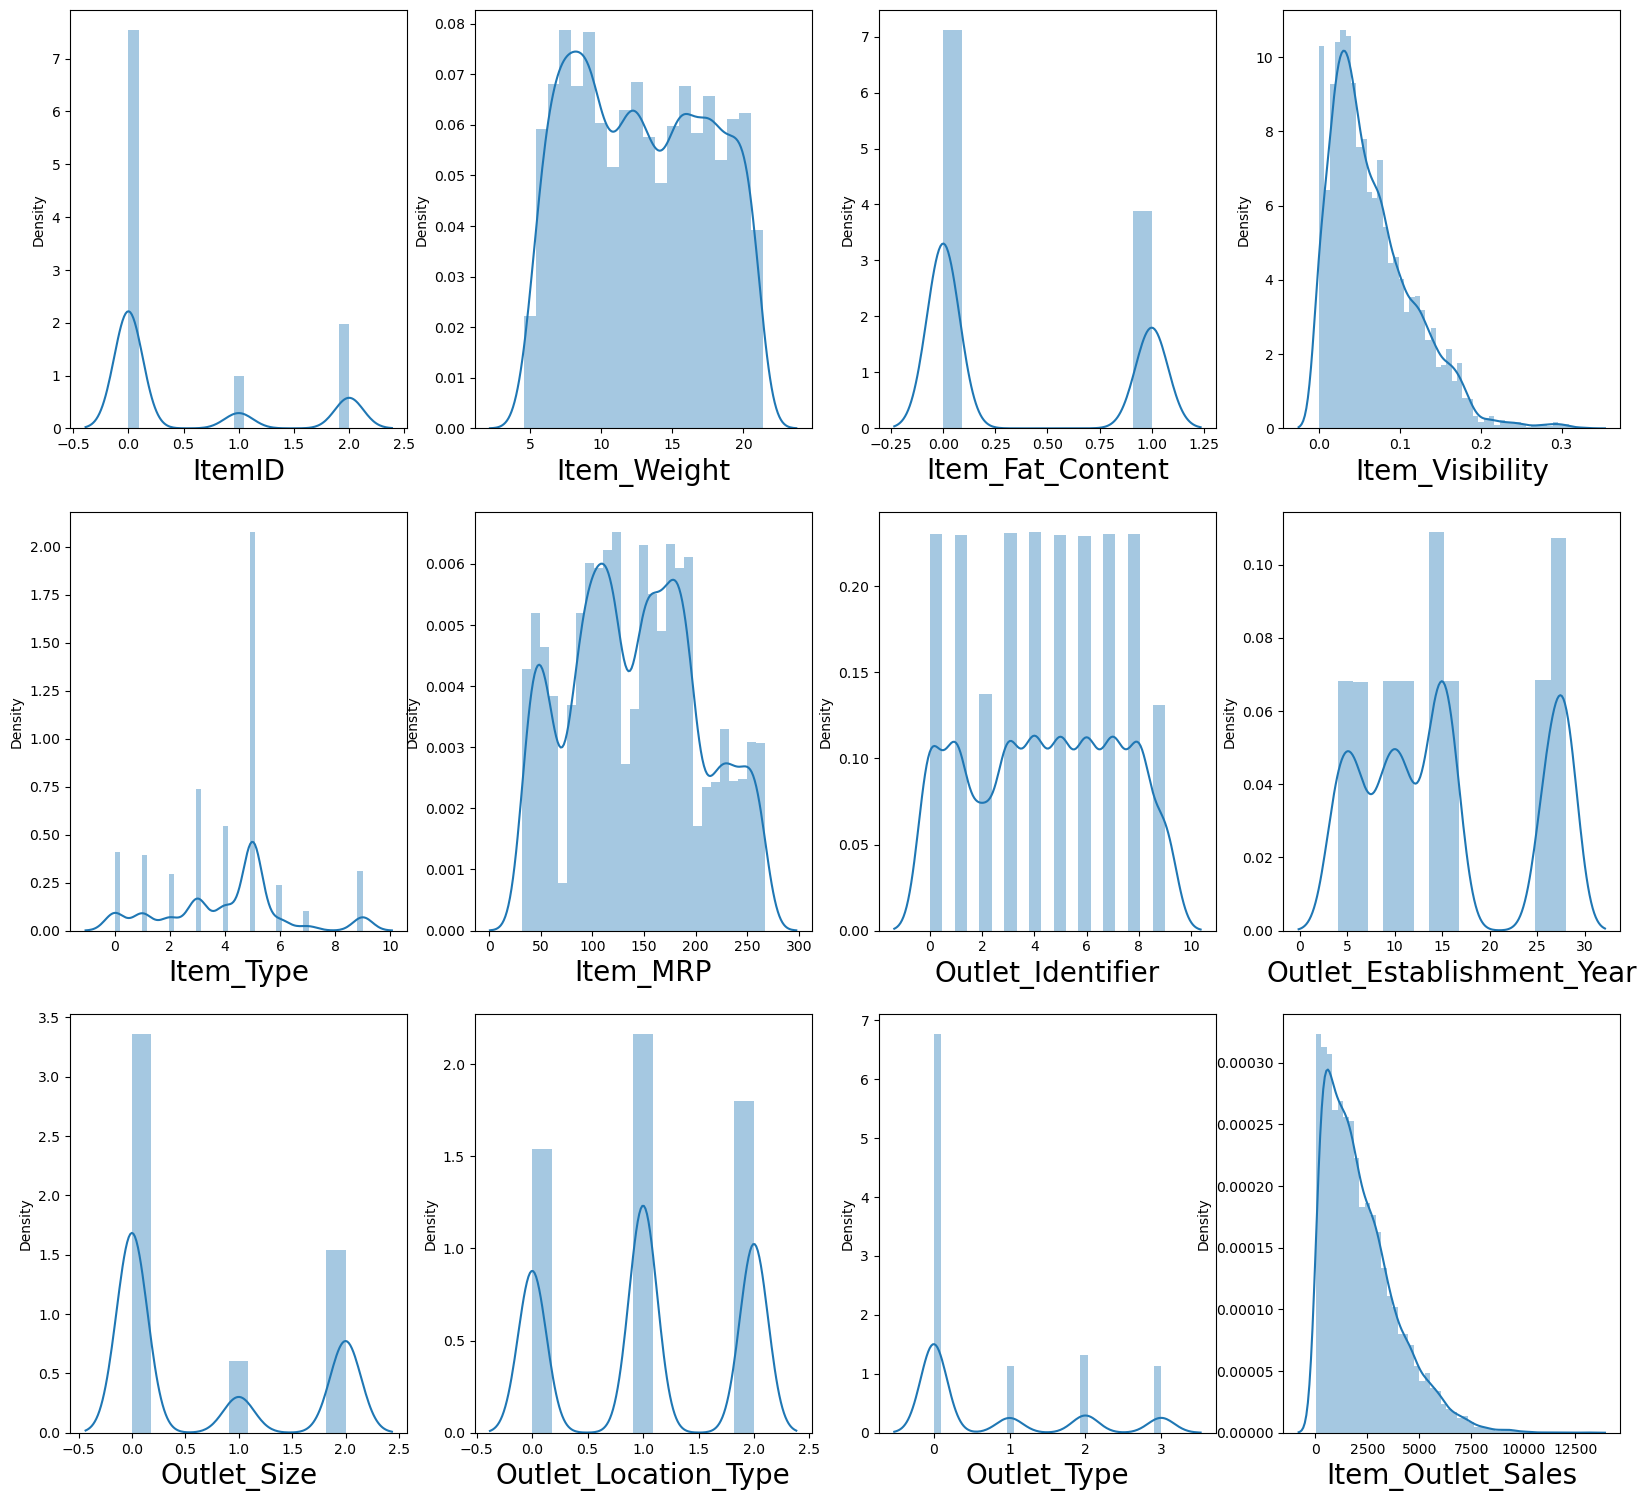

In [61]:
plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1
for column in df_train.columns:
    if plotnumber<=12:
        ax=plt.subplot(4,4,plotnumber)
        sn.distplot(df_train[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

###### ItemID,Item_Fat_Content,Item_Type,Item_Mrp,Outlet_Establishment_Year,Outlet_Size,Outlet_location_type, outlet_type are all bimodal dist plot

###### Item_Outlet_Sales & Item_Visibility are positively skewed

###### Outlet_Identifier& Item_Weight are rectangular dist plot

###### We can use mean imputer on item weight column but mean imputation is bad practice as it doesn’t take into account Feature Correlation. It also reduces variance of the data and increases bias in data which leads to inaccuracy of model. Hence lets use knn imputer with n_neighbours=5. the missing values will be replaced by the mean value of 5 nearest neighbors measured by Euclidean distance

In [62]:
imputer =KNNImputer(n_neighbors=5)
df_train = pd.DataFrame(imputer.fit_transform(df_train),columns = df_train.columns)

In [63]:
imputer =KNNImputer(n_neighbors=5)
df_test = pd.DataFrame(imputer.fit_transform(df_test),columns = df_test.columns)

In [64]:
df_train

,ItemID,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,0.00,9.30,0.00,0.02,0.00,249.81,0.00,14.00,0.00,0.00,0.00,3735.14
1,1.00,5.92,1.00,0.02,1.00,48.27,1.00,4.00,0.00,1.00,1.00,443.42
2,0.00,17.50,0.00,0.02,2.00,141.62,0.00,14.00,0.00,0.00,0.00,2097.27
3,0.00,19.20,1.00,0.00,3.00,182.09,2.00,15.00,0.00,1.00,2.00,732.38
4,2.00,8.93,0.00,0.00,4.00,53.86,3.00,26.00,1.00,1.00,0.00,994.71
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,0.00,6.87,0.00,0.06,5.00,214.52,3.00,26.00,1.00,1.00,0.00,2778.38
8519,0.00,8.38,1.00,0.05,5.00,108.16,5.00,11.00,0.00,2.00,0.00,549.28
8520,2.00,10.60,0.00,0.04,9.00,85.12,8.00,9.00,2.00,2.00,0.00,1193.11
8521,0.00,7.21,1.00,0.15,5.00,103.13,1.00,4.00,0.00,1.00,1.00,1845.60


In [65]:
df_test

,ItemID,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,0.00,20.75,0.00,0.01,5.00,107.86,0.00,14.00,0.00,0.00,0.00
1,0.00,8.30,1.00,0.04,0.00,87.32,6.00,6.00,0.00,2.00,0.00
2,2.00,14.60,0.00,0.10,7.00,241.75,2.00,15.00,0.00,1.00,2.00
3,0.00,7.32,0.00,0.02,5.00,155.03,6.00,6.00,0.00,2.00,0.00
4,0.00,10.29,1.00,0.12,0.00,234.23,4.00,28.00,0.00,1.00,3.00
...,...,...,...,...,...,...,...,...,...,...,...
5676,0.00,10.50,1.00,0.01,5.00,141.32,7.00,16.00,2.00,0.00,0.00
5677,0.00,7.60,1.00,0.14,6.00,169.14,1.00,4.00,0.00,1.00,1.00
5678,2.00,10.00,0.00,0.07,9.00,118.74,5.00,11.00,0.00,2.00,0.00
5679,0.00,15.30,1.00,0.00,5.00,214.62,6.00,6.00,0.00,2.00,0.00


In [66]:
print(df_train.isnull().sum())

ItemID                       0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64


In [67]:
print(df_test.isnull().sum())

ItemID                       0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64


In [68]:
df_train.describe()

,ItemID,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
count,8523.00,8523.00,8523.00,8523.00,8523.00,8523.00,8523.00,8523.00,8523.00,8523.00,8523.00,8523.00
mean,0.47,12.84,0.35,0.07,4.05,140.99,4.40,15.17,0.67,1.05,0.69,2181.29
std,0.79,4.31,0.48,0.05,2.16,62.28,2.79,8.37,0.88,0.78,1.06,1706.50
min,0.00,4.55,0.00,0.00,0.00,31.29,0.00,4.00,0.00,0.00,0.00,33.29
25%,0.00,9.30,0.00,0.03,3.00,93.83,2.00,9.00,0.00,0.00,0.00,834.25
50%,0.00,12.62,0.00,0.05,5.00,143.01,4.00,14.00,0.00,1.00,0.00,1794.33
75%,1.00,16.20,1.00,0.09,5.00,185.64,7.00,26.00,2.00,2.00,1.00,3101.30
max,2.00,21.35,1.00,0.33,9.00,266.89,9.00,28.00,2.00,2.00,3.00,13086.96


In [69]:
df_test.describe()

,ItemID,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
count,5681.00,5681.00,5681.00,5681.00,5681.00,5681.00,5681.00,5681.00,5681.00,5681.00,5681.00
mean,0.47,12.63,0.35,0.07,4.06,141.02,4.40,15.17,0.67,1.05,0.69
std,0.80,4.32,0.48,0.05,2.14,61.81,2.79,8.37,0.88,0.78,1.06
min,0.00,4.55,0.00,0.00,0.00,31.99,0.00,4.00,0.00,0.00,0.00
25%,0.00,9.10,0.00,0.03,3.00,94.41,2.00,9.00,0.00,0.00,0.00
50%,0.00,12.35,0.00,0.05,5.00,141.42,4.00,14.00,0.00,1.00,0.00
75%,1.00,15.85,1.00,0.09,5.00,186.03,7.00,26.00,2.00,2.00,1.00
max,2.00,21.35,1.00,0.32,9.00,266.59,9.00,28.00,2.00,2.00,3.00


#### check correlation of train dataset

In [70]:
df_train.corr()['Item_Outlet_Sales']

ItemID                      -0.02
Item_Weight                  0.01
Item_Fat_Content             0.02
Item_Visibility             -0.13
Item_Type                   -0.02
Item_MRP                     0.57
Outlet_Identifier           -0.04
Outlet_Establishment_Year    0.05
Outlet_Size                 -0.09
Outlet_Location_Type         0.10
Outlet_Type                  0.01
Item_Outlet_Sales            1.00
Name: Item_Outlet_Sales, dtype: float64

<AxesSubplot:>

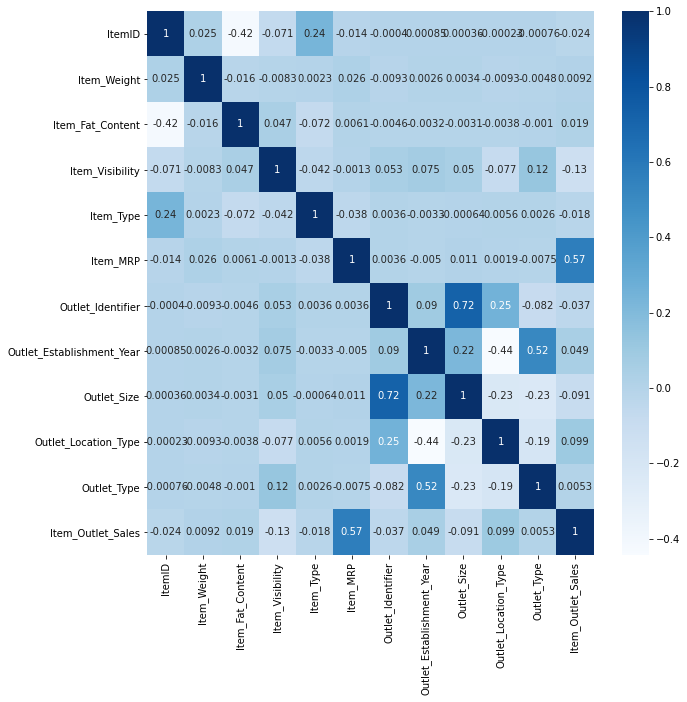

In [71]:
%matplotlib inline
plt.figure(figsize=[10,10])
sn.heatmap(df_train.corr(),annot=True,cmap='Blues')

#### check for outliers

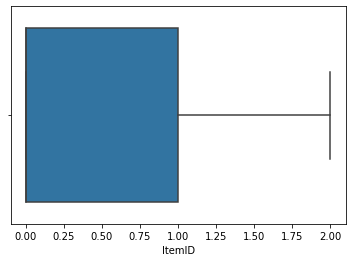

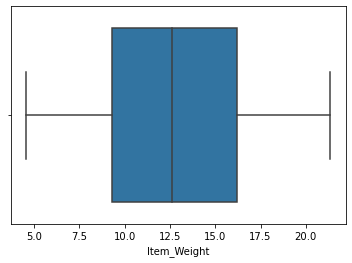

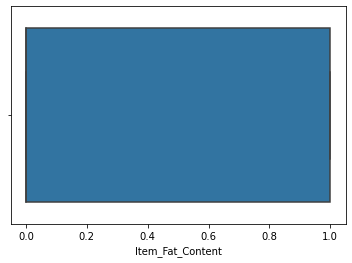

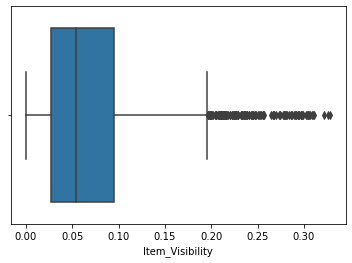

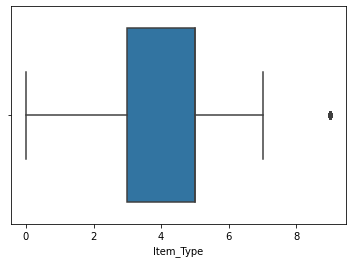

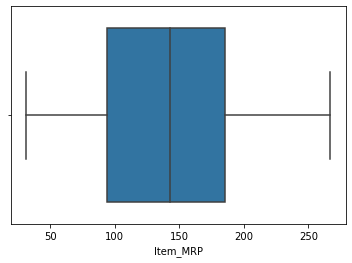

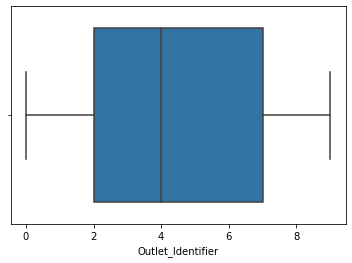

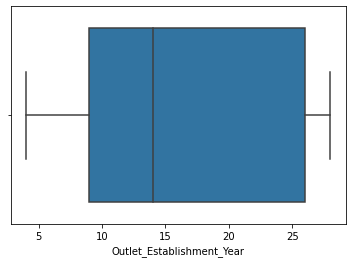

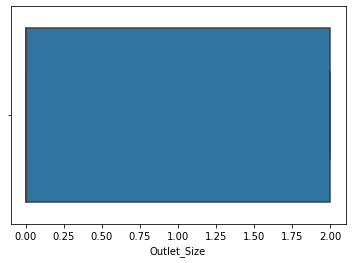

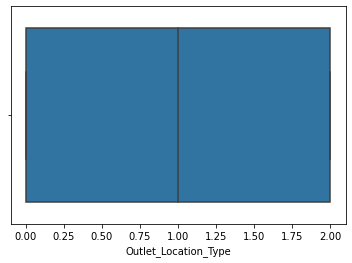

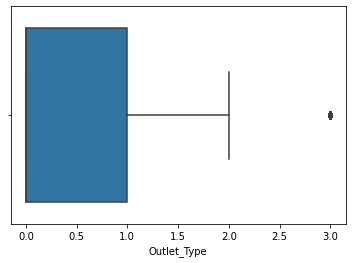

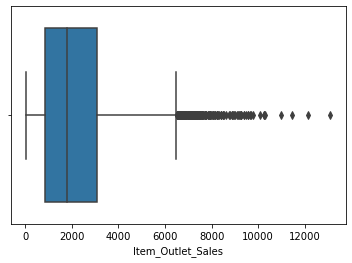

In [72]:
for i in df_train.columns:
    sn.boxplot(df_train[i])
    plt.show()

Item_Fat_Content,Item_visibility,Item_type,Outlet_type,Item_outlet_sales have outliers present in them
categorical datatype outliers are valid as they are Natural Variation
only item_visibilty & item_outlet_sales are non categorical type having valid outliers as they are Natural Variation, hence no need to remove outliers

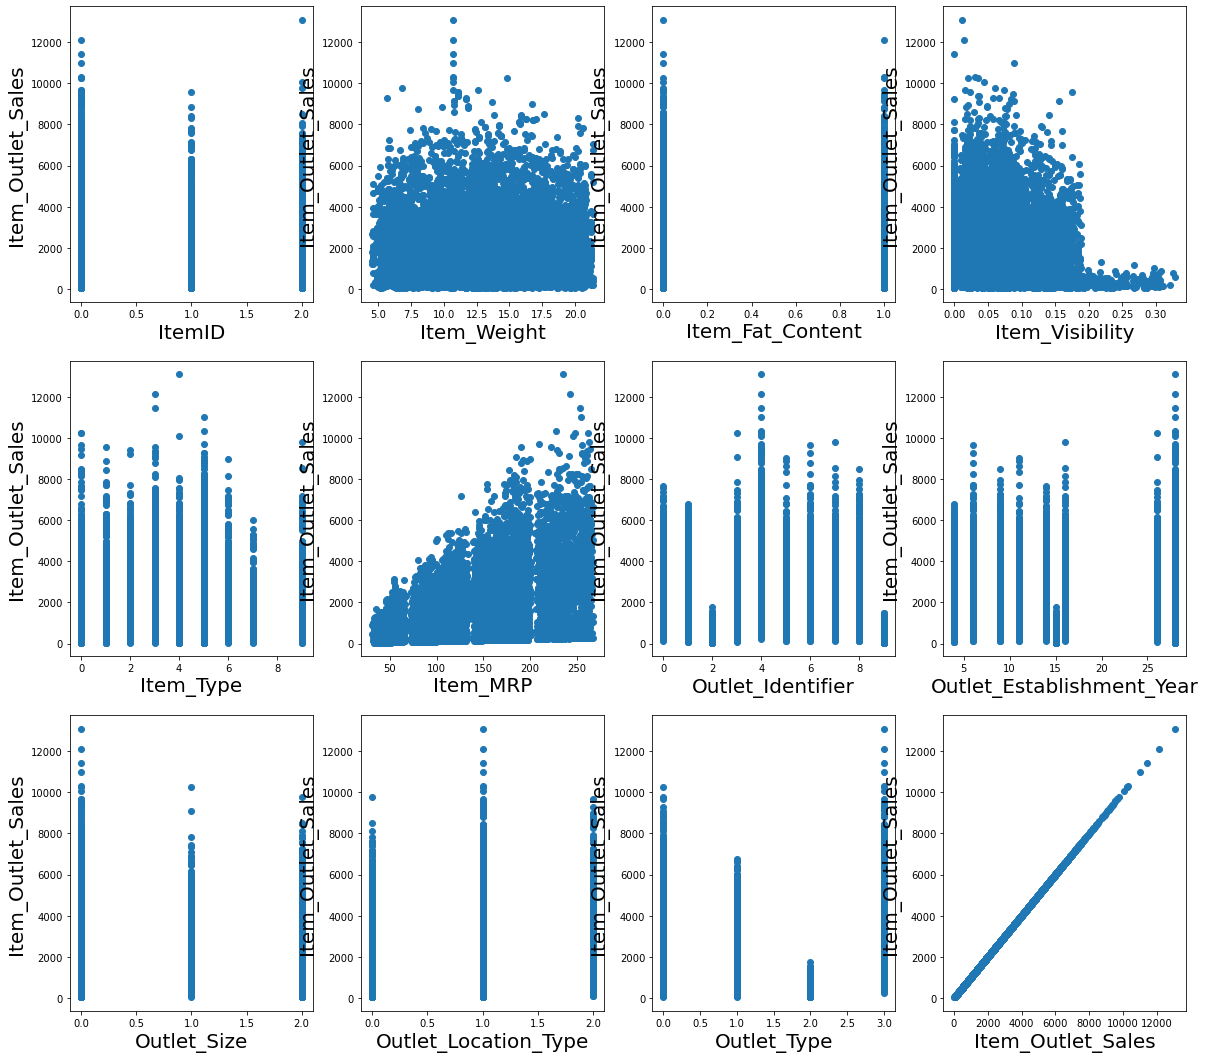

In [73]:
plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1
for i in df_train.columns:
    if plotnumber<=12:
        ax=plt.subplot(4,4,plotnumber)
        plt.scatter(df_train[i],df_train['Item_Outlet_Sales'])
        plt.xlabel(i,fontsize=20)
        plt.ylabel('Item_Outlet_Sales',fontsize=20)
    plotnumber+=1
plt.show()

Higher the oulet size lesser is the sales
Outlet_location_type 1 has more chances of higher sales
Outlet_type 3 has more chances of higher sales
Outlet_establishment_year of the oldest year has more chances of higher sales
Outlet_identifier 4 has more chances of higher sales
higher the cost higher the sales
item type, item id, item weight does not provide proper insight in sales data
low fat products have higher sales
lesser visibility item have more chances of higher sales
drop column outlet identifier in both dataset

In [74]:
df_train=df_train.drop(['Outlet_Identifier'],axis=1)
df_test=df_test.drop(['Outlet_Identifier'],axis=1)
df_train

,ItemID,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,0.00,9.30,0.00,0.02,0.00,249.81,14.00,0.00,0.00,0.00,3735.14
1,1.00,5.92,1.00,0.02,1.00,48.27,4.00,0.00,1.00,1.00,443.42
2,0.00,17.50,0.00,0.02,2.00,141.62,14.00,0.00,0.00,0.00,2097.27
3,0.00,19.20,1.00,0.00,3.00,182.09,15.00,0.00,1.00,2.00,732.38
4,2.00,8.93,0.00,0.00,4.00,53.86,26.00,1.00,1.00,0.00,994.71
...,...,...,...,...,...,...,...,...,...,...,...
8518,0.00,6.87,0.00,0.06,5.00,214.52,26.00,1.00,1.00,0.00,2778.38
8519,0.00,8.38,1.00,0.05,5.00,108.16,11.00,0.00,2.00,0.00,549.28
8520,2.00,10.60,0.00,0.04,9.00,85.12,9.00,2.00,2.00,0.00,1193.11
8521,0.00,7.21,1.00,0.15,5.00,103.13,4.00,0.00,1.00,1.00,1845.60


In [75]:
df_train.corr()['Item_Outlet_Sales']

ItemID                      -0.02
Item_Weight                  0.01
Item_Fat_Content             0.02
Item_Visibility             -0.13
Item_Type                   -0.02
Item_MRP                     0.57
Outlet_Establishment_Year    0.05
Outlet_Size                 -0.09
Outlet_Location_Type         0.10
Outlet_Type                  0.01
Item_Outlet_Sales            1.00
Name: Item_Outlet_Sales, dtype: float64

##### Drop columns itemid, item weight as they have least correlation

In [76]:
df_train=df_train.drop(['ItemID','Item_Weight'],axis=1)
df_test=df_test.drop(['ItemID','Item_Weight'],axis=1)
df_train.corr()['Item_Outlet_Sales']

Item_Fat_Content             0.02
Item_Visibility             -0.13
Item_Type                   -0.02
Item_MRP                     0.57
Outlet_Establishment_Year    0.05
Outlet_Size                 -0.09
Outlet_Location_Type         0.10
Outlet_Type                  0.01
Item_Outlet_Sales            1.00
Name: Item_Outlet_Sales, dtype: float64

##### check multicorrelation and drop columns accordingly

In [77]:
vif = pd.DataFrame()
vif["vif"] = [variance_inflation_factor(df_train.drop(['Item_Outlet_Sales'],axis=1).values,i) for i in range(df_train.drop(['Item_Outlet_Sales'],axis=1).shape[1]) ]
vif["Features"] = df_train.drop(['Item_Outlet_Sales'],axis=1).columns
vif

,vif,Features
0,1.51,Item_Fat_Content
1,2.50,Item_Visibility
2,3.69,Item_Type
3,4.62,Item_MRP
4,6.00,Outlet_Establishment_Year
5,2.01,Outlet_Size
6,2.55,Outlet_Location_Type
7,2.36,Outlet_Type


##### there is no need to drop any columns. do feature scaling

In [78]:
scaler = StandardScaler()
df_train[['Item_Visibility','Item_MRP']] = scaler.fit_transform(df_train[['Item_Visibility','Item_MRP']])
df_test[['Item_Visibility','Item_MRP']] = scaler.transform(df_test[['Item_Visibility','Item_MRP']])
df_train

,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,0.00,-0.97,0.00,1.75,14.00,0.00,0.00,0.00,3735.14
1,1.00,-0.91,1.00,-1.49,4.00,0.00,1.00,1.00,443.42
2,0.00,-0.96,2.00,0.01,14.00,0.00,0.00,0.00,2097.27
3,1.00,-1.28,3.00,0.66,15.00,0.00,1.00,2.00,732.38
4,0.00,-1.28,4.00,-1.40,26.00,1.00,1.00,0.00,994.71
...,...,...,...,...,...,...,...,...,...
8518,0.00,-0.18,5.00,1.18,26.00,1.00,1.00,0.00,2778.38
8519,1.00,-0.37,5.00,-0.53,11.00,0.00,2.00,0.00,549.28
8520,0.00,-0.60,9.00,-0.90,9.00,2.00,2.00,0.00,1193.11
8521,1.00,1.53,5.00,-0.61,4.00,0.00,1.00,1.00,1845.60


In [79]:
x=df_train.drop(['Item_Outlet_Sales'],axis=1)
y=df_train[['Item_Outlet_Sales']]

##### check biasing and remove if any

In [80]:
print(x.skew())
print(len(x.skew().loc[x.skew()>0.55]))

Item_Fat_Content             0.62
Item_Visibility              1.17
Item_Type                    0.04
Item_MRP                     0.13
Outlet_Establishment_Year    0.40
Outlet_Size                  0.70
Outlet_Location_Type        -0.08
Outlet_Type                  1.19
dtype: float64
4


In [81]:
for index in x.skew().index:
    if x.skew().loc[index] >0.55:
        x[index]=np.cbrt(x[index])

In [82]:
print(x.skew())
print()
print(len(x.skew().loc[x.skew()>0.55]))

Item_Fat_Content             0.62
Item_Visibility              0.41
Item_Type                    0.04
Item_MRP                     0.13
Outlet_Establishment_Year    0.40
Outlet_Size                  0.50
Outlet_Location_Type        -0.08
Outlet_Type                  0.74
dtype: float64

2


##### try to reduce more columns if possible by using pca

In [83]:
for i in range(2,x.shape[1]+1):
    pca = PCA(n_components=i)
    principalComponents = pca.fit_transform(x)
    print(i,sum(pca.explained_variance_ratio_))

2 0.9600918410850728
3 0.9728875441917861
4 0.983012182646612
5 0.9893334093556194
6 0.9949813480514066
7 0.9978832021261755
8 1.0


In [84]:
pca = PCA(n_components=3)
principalComponents = pca.fit_transform(x)
testy=pca.transform(df_test)

### Model Building & Evaluation

In [94]:
models=[GradientBoostingRegressor(),NuSVR(),LinearRegression(),Ridge(),RidgeCV(),BayesianRidge(),SGDRegressor(),SVR(),
        AdaBoostRegressor(),LinearSVR(),KNeighborsRegressor(),RandomForestRegressor(),BaggingRegressor(),
       DecisionTreeRegressor()]

In [95]:
for i in models:
    x_train,x_test,y_train,y_test=train_test_split(principalComponents,y,random_state = 42,test_size=0.20)
    scores=cross_val_score(i,x_train,y_train,cv=5,scoring='r2')
    score=np.mean(scores)
    i.fit(x_train,y_train)
    y_pred=i.predict(x_test)
    if r2_score(y_test,y_pred)>score:
        diff=r2_score(y_test,y_pred)-score
    else:
        diff=score-r2_score(y_test,y_pred)
    print('*'*10)
    print(i)
    print('score',score)
    print('r2',r2_score(y_test,y_pred))
    print('diff',diff)

**********
GradientBoostingRegressor()
score 0.58471941209975
r2 0.6114829831194352
diff 0.026763571019685184
**********
NuSVR()
score 0.001039087581120679
r2 0.01714103497221242
diff 0.01610194739109174
**********
LinearRegression()
score 0.31669836087998043
r2 0.3246225566688913
diff 0.007924195788910848
**********
Ridge()
score 0.3166984339007429
r2 0.32462297733683987
diff 0.007924543436096942
**********
RidgeCV(alphas=array([ 0.1,  1. , 10. ]))
score 0.3166984339007848
r2 0.32462297733614653
diff 0.007924543435361753
**********
BayesianRidge()
score 0.31669820313933006
r2 0.3246250578758135
diff 0.007926854736483468
**********
SGDRegressor()
score 0.2745966755464192
r2 0.3240165519311117
diff 0.049419876384692474
**********
SVR()
score -0.030236808898287525
r2 -0.002508874031359687
diff 0.027727934866927838
**********
AdaBoostRegressor()
score 0.42550844294989
r2 0.4332882221561807
diff 0.007779779206290693
**********
LinearSVR()
score 0.1276736776340525
r2 0.20260613887035328
dif

#### Gradient descent is better in accuracy and has least diff in model score and predict score

## Hyperparameter tuning

In [97]:
parameters={"n_estimators":[10,100,500],"criterion":['friedman_mse', 'mse','mae'],'max_features':['auto', 'sqrt', 'log2']}

In [98]:
clf = RandomizedSearchCV(GradientBoostingRegressor(), parameters, cv=5,scoring="r2",n_iter=5)

In [99]:
clf.fit(principalComponents,y)

RandomizedSearchCV(cv=5, estimator=GradientBoostingRegressor(), n_iter=5,
                   param_distributions={'criterion': ['friedman_mse', 'mse',
                                                      'mae'],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'n_estimators': [10, 100, 500]},
                   scoring='r2')

In [104]:
clf.best_params_

{'n_estimators': 100, 'max_features': 'sqrt', 'criterion': 'mse'}

In [101]:
def besttrain(model,x,y):
    random=0
    score=0
    for i in range(42,100):
        x_train,x_test,y_train,y_test=train_test_split(x,y,random_state = i,test_size=0.20,shuffle=True)
        model.fit(x_train,y_train)
        tmp=r2_score(y_test,model.predict(x_test))
        if tmp>score:
            score=tmp
            random=i
    return random

In [102]:
besttrain(GradientBoostingRegressor(n_estimators=100,criterion='mse',max_features='auto'),principalComponents,y)

76

In [103]:
x_train,x_test,y_train,y_test=train_test_split(principalComponents, y,random_state = 76,test_size=0.20,shuffle=True)
model=GradientBoostingRegressor(n_estimators=100,criterion='mse',max_features='sqrt')
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
score=r2_score(y_test,y_pred)
print('coeff of determination is:',score)
print('mean absolute error:',mean_absolute_error(y_test,y_pred))
print('mean squared error:',mean_squared_error(y_test,y_pred))
print('root mean square error:',np.sqrt(mean_squared_error(y_test,y_pred)))
scores =cross_val_score(model,x,y,cv=5)
print('cross val score',scores.mean())
print('std err',scores.std())

coeff of determination is: 0.5987309189950247
mean absolute error: 761.9211230304472
mean squared error: 1147411.406406902
root mean square error: 1071.1729115352489
cross val score 0.5876512458221418
std err 0.012150038320553174


##### Saving the model

In [105]:
joblib.dump(model, 'Mart.pkl')

['Mart.pkl']